In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


plt.style.use("fivethirtyeight")

In [2]:
stockSymbol=["FB","AMZN","AAPL","NFLX","GOOG","GC=F"]

In [3]:
stockStartDate="2014-10-1"
today=datetime.today().strftime("%Y-%m-%d")
today

'2021-11-14'

In [4]:
numAssets=len(stockSymbol)
print("You have "+str(numAssets)+" stocks in portfolio")

You have 6 stocks in portfolio


In [5]:
def getMyPortfolio (stockSymbol, stockStartDate, today):
    data_df=yf.download(stockSymbol,stockStartDate, today)["Adj Close"]
    
    return data_df

    


In [6]:
myStocks=getMyPortfolio(stockSymbol, stockStartDate, today)
myStocks.head()


[*********************100%***********************]  6 of 6 completed


,AAPL,AMZN,FB,GC=F,GOOG,NFLX
Date,,,,,,
2014-09-30,22.705523,322.440002,79.040001,1210.500000,575.779175,64.454285
2014-10-01,22.351704,317.459991,76.550003,1214.599976,566.714111,62.685715
2014-10-02,22.513962,318.410004,77.080002,1214.199951,568.519104,64.282860
2014-10-03,22.450863,322.739990,77.440002,1192.199951,573.704895,65.648567
2014-10-06,22.450863,322.200012,77.559998,1206.699951,575.769226,66.211426


In [7]:
def showGraph( stockSymbol, stockStartDate, today):
    
    mystocks=getMyPortfolio(stockSymbol, stockStartDate, today)
    plt.figure(figsize=(20,8))
    
    for c in mystocks.columns:
        plt.plot(mystocks[c], label=c)
        
    
    plt.title("Porfolio Adj Close Price history")
    plt.xlabel("Date", fontsize=18)
    plt.ylabel("Adj Close Price", fontsize=18)
    plt.legend(mystocks.columns,loc="upper left",fontsize=15)
    plt.show()
    
    

[*********************100%***********************]  6 of 6 completed


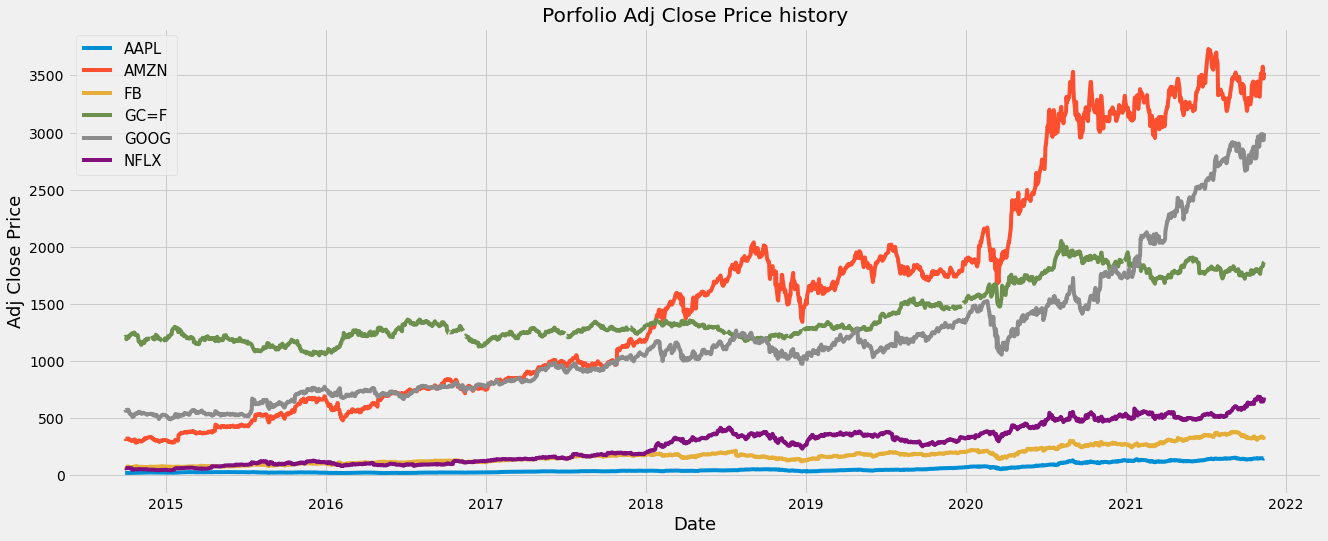

In [8]:
showGraph( stockSymbol, stockStartDate, today)

In [9]:
daily_simple_return=myStocks.pct_change(1)
daily_simple_return.head()

,AAPL,AMZN,FB,GC=F,GOOG,NFLX
Date,,,,,,
2014-09-30,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-01,-0.015583,-0.015445,-0.031503,0.003387,-0.015744,-0.027439
2014-10-02,0.007259,0.002993,0.006924,-0.000329,0.003185,0.025479
2014-10-03,-0.002803,0.013599,0.004670,-0.018119,0.009122,0.021245
2014-10-06,0.000000,-0.001673,0.001550,0.012162,0.003598,0.008574


In [10]:
daily_simple_return.corr()

,AAPL,AMZN,FB,GC=F,GOOG,NFLX
AAPL,1.000000,0.553761,0.567415,0.027644,0.597616,0.411150
AMZN,0.553761,1.000000,0.582402,0.002081,0.639142,0.508835
FB,0.567415,0.582402,1.000000,0.010841,0.653020,0.434142
GC=F,0.027644,0.002081,0.010841,1.000000,0.007867,0.020812
GOOG,0.597616,0.639142,0.653020,0.007867,1.000000,0.469303
NFLX,0.411150,0.508835,0.434142,0.020812,0.469303,1.000000


In [11]:
daily_simple_return.cov()

,AAPL,AMZN,FB,GC=F,GOOG,NFLX
AAPL,0.000328,1.905710e-04,0.000203,4.670767e-06,0.000180,0.000195
AMZN,0.000191,3.608698e-04,0.000219,3.687013e-07,0.000202,0.000254
FB,0.000203,2.189199e-04,0.000392,2.000626e-06,0.000215,0.000225
GC=F,0.000005,3.687013e-07,0.000002,8.698509e-05,0.000001,0.000005
GOOG,0.000180,2.018341e-04,0.000215,1.219767e-06,0.000276,0.000205
NFLX,0.000195,2.536247e-04,0.000225,5.093010e-06,0.000205,0.000688


In [12]:
daily_simple_return.var()

AAPL    0.000328
AMZN    0.000361
FB      0.000392
GC=F    0.000087
GOOG    0.000276
NFLX    0.000688
dtype: float64

In [13]:
print("Stock Volatility ")
daily_simple_return.std()

Stock Volatility 


AAPL    0.018116
AMZN    0.018997
FB      0.019787
GC=F    0.009327
GOOG    0.016623
NFLX    0.026239
dtype: float64

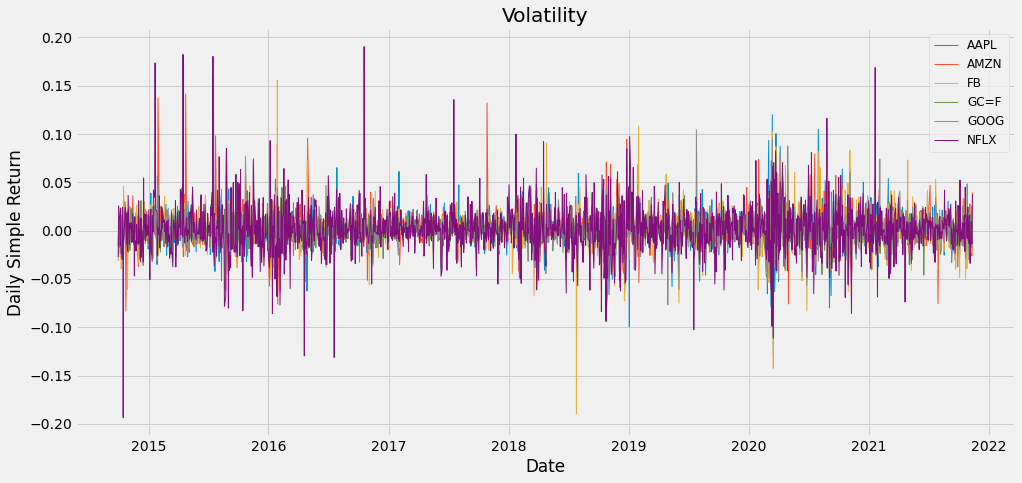

In [19]:
plt.figure(figsize=(15,7))

for c in daily_simple_return.columns:
    plt.plot(daily_simple_return[c],lw=1,label=c)
    
plt.legend(loc="upper right", fontsize=12)
plt.title("Volatility")
plt.ylabel("Daily Simple Return")
plt.xlabel("Date")    
plt.show()

In [15]:
dailyMeanSimpleReturn=daily_simple_return.mean()
print("Daily mean Simple Return")
print(dailyMeanSimpleReturn)

Daily mean Simple Return
AAPL    0.001217
AMZN    0.001513
FB      0.001012
GC=F    0.000285
GOOG    0.001057
NFLX    0.001658
dtype: float64


In [16]:
weights=np.array([0.2,0.2,0.1,0.1,0.1,0.3])
portfolioSimpleReturn=np.sum(dailyMeanSimpleReturn*weights)
print("Daily Expected Portfolio Return "+ str(portfolioSimpleReturn))

Daily Expected Portfolio Return 0.0012788181697154246


In [17]:
print("Expected annnulaized Porfolio simple reutrn "+str(portfolioSimpleReturn*253))

Expected annnulaized Porfolio simple reutrn 0.3235409969380024


In [21]:
dailyCumulSimpleReturn=(daily_simple_return+1).cumprod()
dailyCumulSimpleReturn

,AAPL,AMZN,FB,GC=F,GOOG,NFLX
Date,,,,,,
2014-09-30,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-01,0.984417,0.984555,0.968497,1.003387,0.984256,0.972561
2014-10-02,0.991563,0.987502,0.975202,1.003057,0.987391,0.997340
2014-10-03,0.988784,1.000930,0.979757,0.984882,0.996397,1.018529
2014-10-06,0.988784,0.999256,0.981275,0.996861,0.999983,1.027262
...,...,...,...,...,...,...
2021-11-08,6.625701,10.820556,4.284160,1.509624,5.187805,10.107164
2021-11-09,6.641996,11.091149,4.243041,1.511937,5.184227,10.177601
2021-11-10,6.514715,10.799063,4.145243,1.526311,5.093133,10.036726


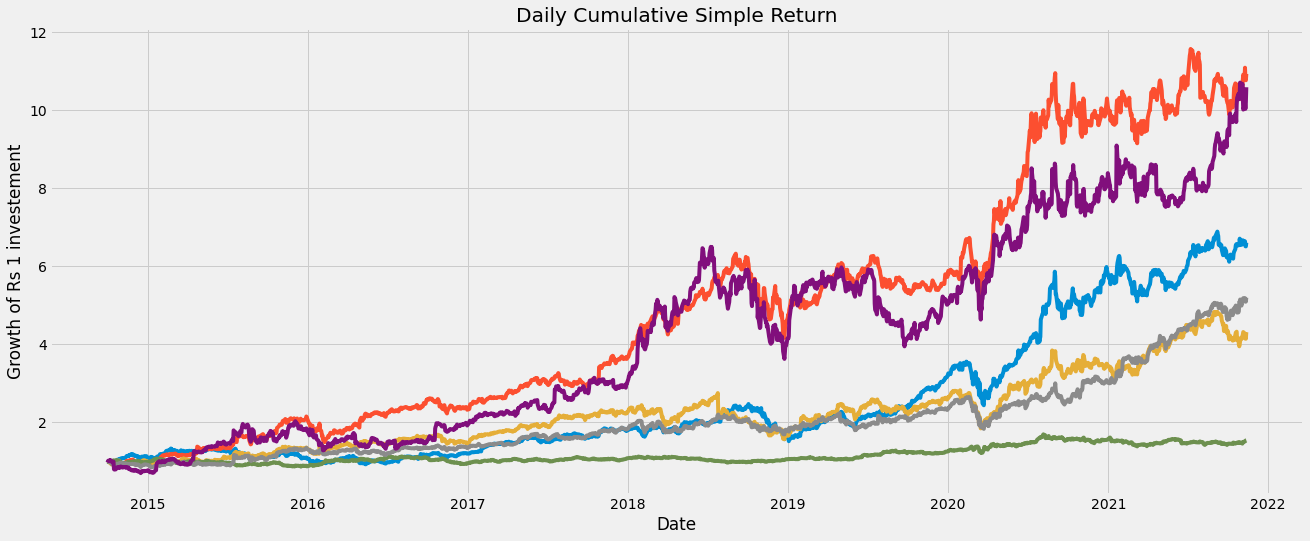

In [27]:
plt.figure(figsize=(20,8))

for c in dailyCumulSimpleReturn:
    plt.plot(dailyCumulSimpleReturn[c])
    
plt.title("Daily Cumulative Simple Return")
plt.xlabel("Date")
plt.ylabel("Growth of Rs 1 investement")
plt.show()